<a href="https://colab.research.google.com/github/hailes1/MCMProjects/blob/main/Random_Walk_Project_Dag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Walk Project 
#####Done by: Dagmawe Haileslassie


In this project we are going to consider a model of two-dimensional random walks that is not confined to integer-valued coordinates: 

  To get started we are first going to start at the origin, and choose a random unit vector (in any direction) for each step. What this means is we are going to determine a step of the walk, by first choosing an angle θ (uniformly) from the interval [0, 2π).
The step of the walk will then be (cos(θ),sin(θ)).

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import decimal 

In [ ]:
#define the possible moves of each step. 
dirs = np.array([[1,0],[-1,0],[0,1], [0,-1]])
#define the number of steps 
numSteps = 100
#setup a new matrix
locations = np.zeros((numSteps,2)) #numSteps rows and 2 colomns
for i in range(1,numSteps):
  degrees = random.uniform(0,360);
  r = random.randrange(4) #random integer {0,1,2,3}
  sinTheta = math.sin(degrees)
  cosTheta = math.cos(degrees)
  move = np.array([[sinTheta,cosTheta]])   #acess random move from the matrix we created earlier 
  locations[i] = locations[i-1] + move #accessing rows with locations[i]
#locations

(-10.0, 10.0)

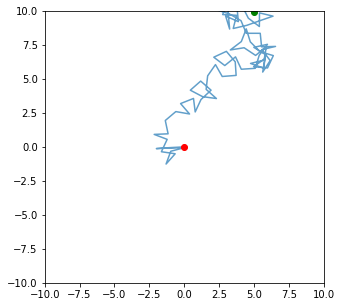

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( locations[:,0], locations[:,1], alpha=0.7 );
plt.plot([0],[0], 'ro')
plt.plot(locations[-1,0],locations[-1,1], 'go')
plt.xlim([-10,10])
plt.ylim([-10,10])

#Implementing a random walk function

Now that we have seen that our approach to solving this problem is fruitful let us implement the random walk as a function and we will make the function take in the total number of steps we want to take. We will then make a few plots of sample random walks to show that the functional implementation works.


In [ ]:
def randomWalk2D(numSteps):   # We already have a numSteps defined in the argument call  
  #setup a new matrix
  locations = np.zeros((numSteps,2)) #numSteps rows and 2 colomns
  for i in range(1,numSteps):
    degrees = random.uniform(0,360);
    sinTheta = math.sin(degrees)
    cosTheta = math.cos(degrees)
    move = np.array([[sinTheta,cosTheta]])   #acess random move from the matrix we created earlier 
    locations[i] = locations[i-1] + move #accessing rows with locations[i]
  return locations


In [ ]:
randomwalk1 = randomWalk2D(100)
randomwalk2 = randomWalk2D(200)

(-10.0, 10.0)

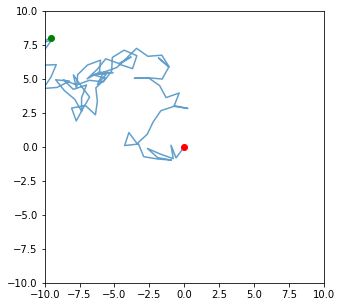

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( randomwalk1[:,0], randomwalk1[:,1], alpha=0.7 );
plt.plot([0],[0], 'ro')
plt.plot(randomwalk1[-1,0],randomwalk1[-1,1], 'go')
plt.xlim([-10,10])
plt.ylim([-10,10])

(-10.0, 10.0)

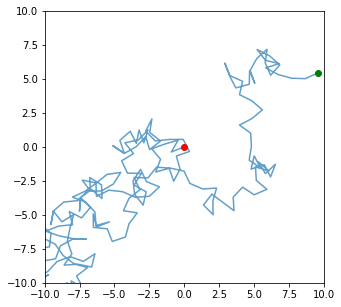

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( randomwalk2[:,0], randomwalk2[:,1], alpha=0.7 );
plt.plot([0],[0], 'ro')
plt.plot(randomwalk2[-1,0],randomwalk2[-1,1], 'go')
plt.xlim([-10,10])
plt.ylim([-10,10])

#Finding the Average Distance of a 2 dimentional random walk from the Origin after n steps. 

In this Task we are trying to find the average distance of the random walk from the origin after n steps. So first we are going to calculate the diameter from our maximum and minimum yvalue point and our maximum and minimum xvalue point. We should think about the pythogoras theorum when looking at possible ways to solve this problem.
Let's try to implement that in a function.

In [ ]:
def diameter(awalk):
  xvals = [p[0] for p in awalk]
  yvals = [p[1] for p in awalk]
  width = max(xvals) - min(xvals)
  height = max(yvals) - min(yvals)
  diameter = math.sqrt(width**2 + height**2)
  return diameter

In the function above we can see that when provided a list of possible steps taken by the randomwalk2D function if first filters out the change in maximum and minimum x value and the change in maximum and minimum y value and then solves the hypothenes. Now that we have that figured out let's try to find an average diameter for a range of numWalks. By doing this we are noting that the diameter is always going to vary for one run of the RandomWalk function we are therefore trying to see the average over a number of runs to find a more accurate result. 


In [ ]:
def avgDiameter(numWalks, numSteps):
  diams = [diameter(randomWalk2D(numSteps)) for _ in range(numWalks)]
  avg = sum(diams)/numWalks
  #print(diams)
  return avg

In [ ]:
avgDiameter(20,100)

15.947766770509418

It is now time to make a plot showing how the average distance of the random walk from the origin depends on n. Therefore to do this we are gong to create a list nvals and running our avgDiameter function for different nvals each a 1000 times. 

In [ ]:
nvals = range(50, 1000, 50)
listofAvgDiam = [avgDiameter(1000,n) for n in nvals]
listofAvgDiam

[10.33732559066418,
 15.195468948751358,
 18.786568304026403,
 22.13239171358417,
 24.826439513865832,
 27.086669463578588,
 29.370677149514492,
 31.62129520928357,
 33.29530004065058,
 35.74515229777667,
 37.242455292827124,
 38.545718518215445,
 41.128892070771194,
 42.08335484556447,
 43.903335030627304,
 45.344876158530276,
 46.76437563786508,
 47.910749233682,
 49.34671078342901]

Text(0, 0.5, 'average diameter')

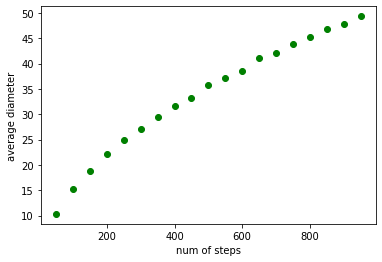

In [ ]:
#vals2 = [i for i in xvals]
plt.plot(nvals, listofAvgDiam, 'go')
#plt.plot(xvals,yvals2, 'r-')
plt.xlabel("num of steps")
plt.ylabel("average diameter")

As we can see, intuitively as the number of steps increases then so does the average diameter of our plots. The location of the points in the graph and how it's increasing seems to be a lot like a log function. Which means when we relate it back to the graph we had when we calculated the average diameter for RandomWalk with 1D it is different.  

#Finding if the RandomWalk function returns to a circle of radius 1/2 around the origin.

Another question we are going to be looking at is wheather the randomwalk function that we have written eariler returns to within a circle of radius 1/2 
around the origin. Why?
Well the implementation we have written earlier is not a grid which means the probability that it would come back to exactly the origin is very low. Therefore we are checking if it's going to come back to a set radius around the origin instead.  
Specifically in this chunk of code we are going to look at what proportion of n-step random walks return at least once to within 1/2 unit of the origin?

In [ ]:
#function that simulate a random walk
def comeBackToOrigin(numSteps):
  w = randomWalk2D(numSteps)
  xvals = [p[0] for p in w]
  yvals = [p[1] for p in w]
  for i in range(1,numSteps):
    width = xvals[i]
    height = yvals[i]
    distance = math.sqrt(width**2 + height**2)
    if distance <= 1/2:
      return True    
      
  return False

Let us try to see if the above function works. 

In [ ]:
comeBackToOrigin(30)

False

Now that we know the function is working and it shows us that for the specific run we made with 30 number of steps it doesn't seem to return to the origin. Let us now calculate the proportion over multiple walks(multiple runs of the RandomWalk2D function) and see  How this proportion depends on n? 

We are then going to Investigate for various n and make a plot of our results.

In [ ]:
def propThatReturn(numWalks, numSteps):
  vals = [comeBackToOrigin(numSteps) for _ in range(numWalks)]#list of true or false values
  n = sum(vals) # number of true values in a list
  return n/numWalks

In [ ]:
propThatReturn(500, 1000)

0.65

In [ ]:
nvals = [10**k for k in range(1,5)]
listofproportions = [propThatReturn(300,n) for n in nvals]
print("finished numSteps", numSteps)
listofproportions

finished numSteps 100


[0.34, 0.5266666666666666, 0.66, 0.65]

Text(0, 0.5, 'proportion that return')

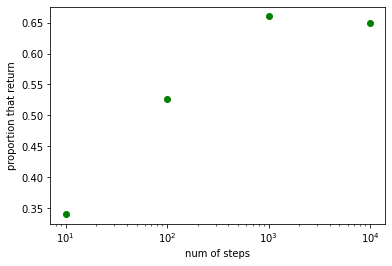

In [ ]:
plt.plot(nvals,listofproportions, 'go')
plt.xscale("log")
plt.xlabel("num of steps")
plt.ylabel("proportion that return")

Looking at the graph above we can see that for num of steps close to 10000 the possibility of "returning" to the origin is about 65%. One of the limitations that I can think about is weather of not I run this long enough for me to see if it increases the percentage. But in the end yes I believe it will eventually return near the origin? 

# Limiting our RandomWalk to -5 <= y <= 5


In the next part of our report we are going to see what happens if we constrain the random walk to the region −5 ≤ y ≤ 5? Therefore we are going to try to Modify our code to keep the y-coordinate of the walk between −5 and 5. We are going to approach this problem by simply changing the degree of turn that it makes in the yvalue by 180. Therefore when the random walk is going to go off the grid it will return 180 degrees to another direction.  

In [ ]:
def randomWalk2DConstrain(numSteps):   # We already have a numSteps defined in the argument call  
  #setup a new matrix
  locations = np.zeros((numSteps,2)) #numSteps rows and 2 colomns
  for i in range(1,numSteps):
    degrees = random.uniform(0,360);
    x = math.sin(degrees)
    y = math.cos(degrees)
    move = np.array([[x,y]])   #acess random move from the matrix we created earlier 
    locations[i] = locations[i-1] + move #accessing rows with locations[i]
    if locations[i,1]<=5 and locations[i,1]<=5 :
      move = np.array([[x,y]])   #acess random move from the matrix we created earlier 
      locations[i] = locations[i-1] + move #accessing rows with locations[i]
    else:
      y = math.cos(180)
      move = np.array([[x,y]])   #acess random move from the matrix we created earlier 
      locations[i] = locations[i-1] + move #accessing rows with locations[i]
  return locations

In [ ]:
randomwalk1Con = randomWalk2DConstrain(100)
randomwalk2Con = randomWalk2DConstrain(200)

(-10.0, 10.0)

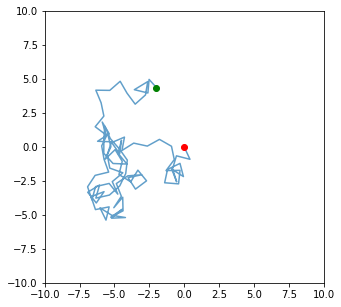

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( randomwalk1Con[:,0], randomwalk1Con[:,1], alpha=0.7 );
plt.plot([0],[0], 'ro')
plt.plot(randomwalk1Con[-1,0],randomwalk1Con[-1,1], 'go')
plt.xlim([-10,10])
plt.ylim([-10,10])

(-10.0, 10.0)

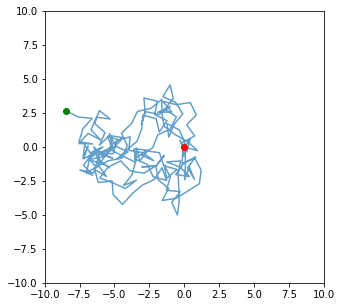

In [ ]:
plt.figure(figsize=(5,5))
plt.plot( randomwalk2Con[:,0], randomwalk2Con[:,1], alpha=0.7 );
plt.plot([0],[0], 'ro')
plt.plot(randomwalk2Con[-1,0],randomwalk2Con[-1,1], 'go')
plt.xlim([-10,10])
plt.ylim([-10,10])

So far we can see that we have made a few plots of random walks to show that your modified implementation works. We should now repeat tasks 2 and 3 for this
constrained random walk. and check if we see any differences 

Let's see if the new change in limiting the y values to -5 and 5 changes anything in the average diameter of the RandomWalk function 

In [ ]:
def avgDiameterConstrain(numWalks, numSteps):
  diams = [diameter(randomWalk2DConstrain(numSteps)) for _ in range(numWalks)]
  avg = sum(diams)/numWalks
  #print(diams)
  return avg

In [ ]:
avgDiameterConstrain(20,100)

13.557272933419345

In [ ]:
nvals = range(50, 1000, 50)
listofAvgDiam = [avgDiameterConstrain(1000,n) for n in nvals]
listofAvgDiam

[9.871156451222932,
 14.17514453623276,
 17.513532428694763,
 20.36573089232692,
 22.247698816455898,
 24.627980542834315,
 26.921568280784378,
 28.764836498921976,
 30.465668598461527,
 32.21278736346677,
 33.95922897368877,
 34.42836482004601,
 36.78125948505565,
 37.96061979129569,
 39.73646651685966,
 40.99654266493772,
 42.691582633392464,
 42.99072042943058,
 44.52929674794361]

Text(0, 0.5, 'average diameter')

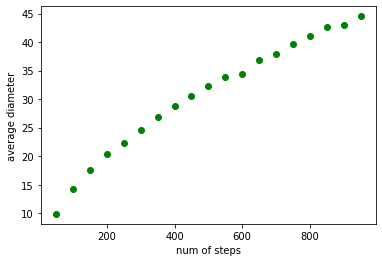

In [ ]:
#vals2 = [i for i in xvals]
plt.plot(nvals, listofAvgDiam, 'go')
#plt.plot(xvals,yvals2, 'r-')
plt.xlabel("num of steps")
plt.ylabel("average diameter")

Let's see if the new change in limiting the y values to -5 and 5 changes anything in finding if the RandomWalk function returns to a circle of radius 1/2 around the origin.  

In [ ]:
def comeBackToOriginConstrain(numSteps):
  w = randomWalk2DConstrain(numSteps)
  xvals = [p[0] for p in w]
  yvals = [p[1] for p in w]
  for i in range(1,numSteps):
    width = xvals[i]
    height = yvals[i]
    distance = math.sqrt(width**2 + height**2)
    if distance <= 1/2:
      return True    
      
  return False

In [ ]:
def propThatReturnConstrain(numWalks, numSteps):
  vals = [comeBackToOriginConstrain(numSteps) for _ in range(numWalks)]#list of true or false values
  n = sum(vals) # number of true values in a list
  return n/numWalks

In [172]:
nvals = [10**k for k in range(1,5)]
listofproportionsConstrain = [propThatReturnConstrain(300,n) for n in nvals]
print("finished numSteps", numSteps)
listofproportionsConstrain

finished numSteps 100


[0.3466666666666667,
 0.5466666666666666,
 0.7266666666666667,
 0.8166666666666667]

Text(0, 0.5, 'proportion that return')

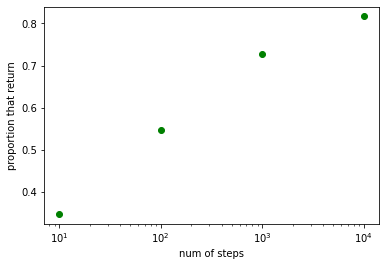

In [173]:
plt.plot(nvals,listofproportionsConstrain, 'go')
plt.xscale("log")
plt.xlabel("num of steps")
plt.ylabel("proportion that return")

# Conclusion

So in this project we were able to implement a new 2-Dimensional RandomWalk function that doesn't seem to be a lot different from the grid implementation we did in class. One thing we can thing about is the percentage of how much the randomwalk function will return to the "origin" and it seems to be lower than our class implementation. We can also see that the diameter of largest and smallest points isn't totally different from the grid implementation as well. I believe this would change with increased sample size but that was one of the major limitations for this project. 

# Limitations

An Intuitive limiation for this project is the limit on the number of steps. I also want to investigate more on other scenarios like, how long it would take to fill up a whole sample space. What if we changed the move not just by one unit but more than that and the outcomes of that problem. There could be a lot of limitations for this project. 